In [1]:
import pandas as pd

Let's upload the sleep data:

In [5]:
sleep = pd.read_csv('./sleep.csv', compression='gzip')
sleep.head()

,Unnamed: 0,Id,Time,Moving,logId,month,day,hour,minute,second,am,time_elapsed
0,31159,2347167796,4/12/2016 10:05:00 PM,3,11385457746,4,12,22,5,0,PM,79500
1,31160,2347167796,4/12/2016 10:06:00 PM,3,11385457746,4,12,22,6,0,PM,79560
2,31161,2347167796,4/12/2016 10:07:00 PM,2,11385457746,4,12,22,7,0,PM,79620
3,31162,2347167796,4/12/2016 10:08:00 PM,1,11385457746,4,12,22,8,0,PM,79680
4,31163,2347167796,4/12/2016 10:09:00 PM,1,11385457746,4,12,22,9,0,PM,79740


In [8]:
sleep = sleep[['Id','Time','Moving']]
sleep.head()

,Id,Time,Moving
0,2347167796,4/12/2016 10:05:00 PM,3
1,2347167796,4/12/2016 10:06:00 PM,3
2,2347167796,4/12/2016 10:07:00 PM,2
3,2347167796,4/12/2016 10:08:00 PM,1
4,2347167796,4/12/2016 10:09:00 PM,1


In [9]:
sleep.Moving.value_counts()

1    73394
2     4130
3      716
Name: Moving, dtype: int64

In [12]:
sleep.Time = pd.to_datetime(sleep.Time)

Now we can perform the same for the heart rate dataset:

In [14]:
heartrate = pd.read_csv('./heartrate.csv', compression='gzip')

In [16]:
heartrate.head()

,Unnamed: 0,Id,Time,Value,month,day,am,second,minute,hour,time_elapsed
0,156594,2347167796,4/12/2016 7:19:00 AM,115,4,12,AM,0,19,7,26340
1,156595,2347167796,4/12/2016 7:19:05 AM,114,4,12,AM,5,19,7,26345
2,156596,2347167796,4/12/2016 7:19:10 AM,113,4,12,AM,10,19,7,26350
3,156597,2347167796,4/12/2016 7:19:25 AM,113,4,12,AM,25,19,7,26365
4,156598,2347167796,4/12/2016 7:19:30 AM,117,4,12,AM,30,19,7,26370


In [18]:
heartrate = heartrate[['Id','Time','Value']]

,Id,Time,Value
0,2347167796,4/12/2016 7:19:00 AM,115
1,2347167796,4/12/2016 7:19:05 AM,114
2,2347167796,4/12/2016 7:19:10 AM,113
3,2347167796,4/12/2016 7:19:25 AM,113
4,2347167796,4/12/2016 7:19:30 AM,117


In [19]:
heartrate.Time = pd.to_datetime(heartrate.Time)

In [23]:
heartrate['Time'] = heartrate['Time'].values.astype('<M8[m]')

In [26]:
heartrate = heartrate.groupby(['Id', 'Time'])['Value'].mean().reset_index()

Now we have both datasets ready:

In [27]:
heartrate.head()

,Id,Time,Value
0,2347167796,2016-04-12 07:19:00,113.100000
1,2347167796,2016-04-12 07:20:00,110.000000
2,2347167796,2016-04-12 07:21:00,99.444444
3,2347167796,2016-04-12 07:22:00,92.375000
4,2347167796,2016-04-12 07:23:00,88.142857


In [22]:
sleep.head()

,Id,Time,Moving
0,2347167796,2016-04-12 22:05:00,3
1,2347167796,2016-04-12 22:06:00,3
2,2347167796,2016-04-12 22:07:00,2
3,2347167796,2016-04-12 22:08:00,1
4,2347167796,2016-04-12 22:09:00,1


In [44]:
hr_sleep = sleep
hr_sleep['Value'] = 0

In [45]:
hr_sleep = pd.merge(sleep, heartrate,  how='left', left_on=['Id','Time'], right_on = ['Id','Time'])

In [46]:
hr_sleep.head()

,Id,Time,Moving,Value_x,Value_y
0,2347167796,2016-04-12 22:05:00,3,0,76.666667
1,2347167796,2016-04-12 22:06:00,3,0,76.666667
2,2347167796,2016-04-12 22:07:00,2,0,80.200000
3,2347167796,2016-04-12 22:08:00,1,0,80.400000
4,2347167796,2016-04-12 22:09:00,1,0,79.666667


In [47]:
hr_sleep.dropna(inplace = True)
hr_sleep.drop(columns = ['Value_x'], inplace = True)
hr_sleep.rename(columns={'Value_y':'Value'}, inplace=True)

In [57]:
hr_sleep.head()

,Id,Time,Moving,Value
0,2347167796,2016-04-12 22:05:00,3,76.666667
1,2347167796,2016-04-12 22:06:00,3,76.666667
2,2347167796,2016-04-12 22:07:00,2,80.200000
3,2347167796,2016-04-12 22:08:00,1,80.400000
4,2347167796,2016-04-12 22:09:00,1,79.666667


In [61]:
hr_sleep.to_csv('./data/hr_sleep.csv')

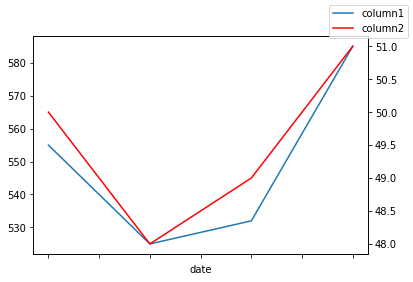

<Figure size 1440x864 with 0 Axes>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({"date": ["2018-01-01", "2018-01-02", "2018-01-03", "2018-01-04"],
                   "column1": [555,525,532,585], 
                   "column2": [50,48,49,51]})

ax = df.plot(x="date", y="column1", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="column2", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.figure(figsize = (20,12))
plt.show()